This Data Analysis project aims to identify gliomas as either LGG (Lower-Grade Glioma) or GBM (Glioblastoma Multiforme) through clinical and molecular/mutation factors, in order to minimize the number of molecular tests.  The data set is from the paper *Tasci, E., Zhuge, Y., Kaur, H., Camphausen, K., & Krauze, A. V. (2022). Hierarchical Voting-Based Feature Selection and Ensemble Learning Model Scheme for Glioma Grading with Clinical and Molecular Characteristics. International Journal of Molecular Sciences, 23(22), 14155* and is downloaded from https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset.

## Variables: 
- Grade (Target variable): Glioma grade class information. (LGG, GBM)
- Gender
- Age at Diagnosis
- Race
- Project: Corresponding TCGA-LGG or TCGA-GBM project names.
- Case_ID: Related project Case_ID information.
- Primary_Diagnosis: Type of primary diagnosis information.
- IDH1: Isocitrate dehydrogenase 1 mutation status (NOT_MUTATED, MUTATED).
- TP53: Tumor protein p53 mutation status (NOT_MUTATED, MUTATED).
- ATRX: ATRX chromatin remodeler mutation status (NOT_MUTATED, MUTATED).
- PTEN: Phosphatase and tensin homolog mutation status (NOT_MUTATED, MUTATED).
- EGFR: Epidermal growth factor receptor mutation status (NOT_MUTATED, MUTATED).
- CIC: Capicua transcriptional repressor mutation status (NOT_MUTATED, MUTATED).
- MUC16: Mucin 16 mutation status (NOT_MUTATED, MUTATED).
- PIK3CA: Phosphatidylinositol-4,5-bisphosphate 3-kinase catalytic subunit alpha mutation status (NOT_MUTATED, MUTATED).
- NF1: Neurofibromin 1 mutation status (NOT_MUTATED, MUTATED).
- PIK3R1: Phosphoinositide-3-kinase regulatory subunit 1 mutation status (NOT_MUTATED, MUTATED).
- FUBP1: Far upstream element binding protein 1 mutation status (NOT_MUTATED, MUTATED).
- RB1: RB transcriptional corepressor 1 mutation status (NOT_MUTATED, MUTATED).
- NOTCH1: Notch receptor 1 mutation status (NOT_MUTATED, MUTATED).
- BCOR: BCL6 corepressor mutation status (NOT_MUTATED, MUTATED).
- CSMD3: CUB and Sushi multiple domains 3 mutation status (NOT_MUTATED, MUTATED).
- SMARCA4: SWI/SNF related, matrix associated, actin-dependent regulator of chromatin, subfamily a, member 4 mutation status (NOT_MUTATED, MUTATED).
- GRIN2A: Glutamate ionotropic receptor NMDA type subunit 2A mutation status (NOT_MUTATED, MUTATED).
- IDH2: Isocitrate dehydrogenase (NADP(+)) 2 mutation status (NOT_MUTATED, MUTATED).
- FAT4: FAT atypical cadherin 4 mutation status (NOT_MUTATED, MUTATED).
- PDGFRA: Platelet-derived growth factor receptor alpha mutation status (NOT_MUTATED, MUTATED).

In [1]:
import os  
os.chdir("C:/Users/fiona/OneDrive/Desktop/5.Semester/Statistik hochkomplexer Daten") # set working directory

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
GliomaData = pd.read_csv('TCGA_GBM_LGG_Mutations_all.csv')
GliomaData.head()

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,TCGA-LGG,TCGA-DU-8164,Male,51 years 108 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,TCGA-LGG,TCGA-QH-A6CY,Male,38 years 261 days,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,LGG,TCGA-LGG,TCGA-HW-A5KM,Male,35 years 62 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,TCGA-LGG,TCGA-E1-A7YE,Female,32 years 283 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,LGG,TCGA-LGG,TCGA-S9-A6WG,Male,31 years 187 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [3]:
print(GliomaData.shape) 

(862, 27)


In [4]:
GliomaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Grade              862 non-null    object
 1   Project            862 non-null    object
 2   Case_ID            862 non-null    object
 3   Gender             862 non-null    object
 4   Age_at_diagnosis   862 non-null    object
 5   Primary_Diagnosis  862 non-null    object
 6   Race               862 non-null    object
 7   IDH1               862 non-null    object
 8   TP53               862 non-null    object
 9   ATRX               862 non-null    object
 10  PTEN               862 non-null    object
 11  EGFR               862 non-null    object
 12  CIC                862 non-null    object
 13  MUC16              862 non-null    object
 14  PIK3CA             862 non-null    object
 15  NF1                862 non-null    object
 16  PIK3R1             862 non-null    object
 1

In [5]:
GliomaData.nunique() # unique values in the data set

Grade                  2
Project                2
Case_ID              862
Gender                 3
Age_at_diagnosis     838
Primary_Diagnosis      7
Race                   6
IDH1                   2
TP53                   2
ATRX                   2
PTEN                   2
EGFR                   2
CIC                    2
MUC16                  2
PIK3CA                 2
NF1                    2
PIK3R1                 2
FUBP1                  2
RB1                    2
NOTCH1                 2
BCOR                   2
CSMD3                  2
SMARCA4                2
GRIN2A                 2
IDH2                   2
FAT4                   2
PDGFRA                 2
dtype: int64

In [6]:
GliomaData.dtypes # check char data types

Grade                object
Project              object
Case_ID              object
Gender               object
Age_at_diagnosis     object
Primary_Diagnosis    object
Race                 object
IDH1                 object
TP53                 object
ATRX                 object
PTEN                 object
EGFR                 object
CIC                  object
MUC16                object
PIK3CA               object
NF1                  object
PIK3R1               object
FUBP1                object
RB1                  object
NOTCH1               object
BCOR                 object
CSMD3                object
SMARCA4              object
GRIN2A               object
IDH2                 object
FAT4                 object
PDGFRA               object
dtype: object

## Data Preparation

We now drop out the non relevant coloumns of the data set **Case_ID**, **Project** and **Primary_Diagnosis**.

In [7]:
GliomaData = GliomaData.drop(columns=["Case_ID", "Project", "Primary_Diagnosis"],axis=1)

Now we extract the dependent variable **Grade**, which grades the glioma. 

Since the variable **Age_at_diagnosis** is not numeric, we extract the pair (year, days) and convert this into a number. For this task we write the function **ConvertAge**.

In [8]:
def ConvertAge(age):
    years = 0
    days = 0
    words = age.split()
    
    for i in range(len(words) - 1): 
        try:
            num = int(words[i]) 
            if "year" in words[i + 1]:  
                years = num
            elif "day" in words[i + 1]:  
                days = num
        except ValueError:
            continue  

    age_num = years + (days / 365) 
    return age_num

In [9]:
GliomaData["Age_at_diagnosis"] = GliomaData["Age_at_diagnosis"].apply(ConvertAge)

In [10]:
print(GliomaData["Age_at_diagnosis"].head())

0    51.295890
1    38.715068
2    35.169863
3    32.775342
4    31.512329
Name: Age_at_diagnosis, dtype: float64


In [11]:
print(GliomaData.isnull().sum()) # no NAs values

Grade               0
Gender              0
Age_at_diagnosis    0
Race                0
IDH1                0
TP53                0
ATRX                0
PTEN                0
EGFR                0
CIC                 0
MUC16               0
PIK3CA              0
NF1                 0
PIK3R1              0
FUBP1               0
RB1                 0
NOTCH1              0
BCOR                0
CSMD3               0
SMARCA4             0
GRIN2A              0
IDH2                0
FAT4                0
PDGFRA              0
dtype: int64


## Exploratory Data Analysis (EDA)

We now begin with the exploratory data analysis. First we take a look into our target variable **Grade** using a pie chart. 

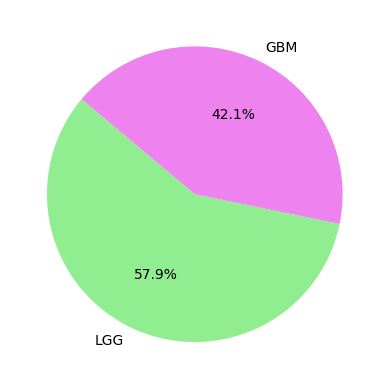

In [12]:
import matplotlib.pyplot as plt
counts = GliomaData['Grade'].value_counts()
plt.pie(counts, labels=counts.index, colors=['lightgreen', 'violet'], autopct='%1.1f%%', startangle=140)
plt.show() # balanced data

The distribution of the two classes looks balanced. 

In [13]:
# Leave out NAs
GliomaData = GliomaData[(GliomaData['Race'] != 'not reported') & (GliomaData['Race'] != '--')]
GliomaData = GliomaData[GliomaData['Gender'] != '--']

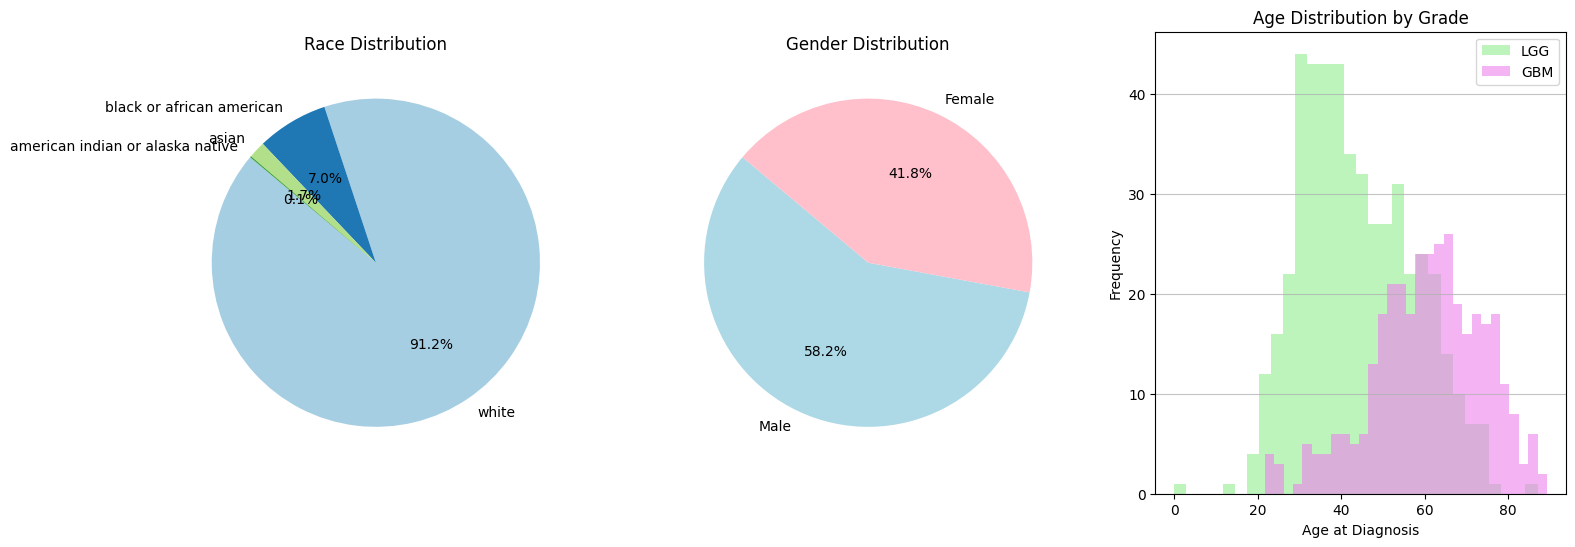

<Figure size 640x480 with 0 Axes>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Race pie chart (4 categories)
counts_race = GliomaData['Race'].value_counts()
axes[0].pie(counts_race, labels=counts_race.index, colors=plt.cm.Paired.colors[:4], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Race Distribution')

# Gender pie chart (3 categories)
counts_gender = GliomaData['Gender'].value_counts()
axes[1].pie(counts_gender, labels=counts_gender.index, colors=['lightblue','pink'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Gender Distribution')

# Age histogram by grade
df_LGG = GliomaData[GliomaData['Grade'] == "LGG"]  # LGG
df_GBM = GliomaData[GliomaData['Grade'] == "GBM"]  # GBM

axes[2].hist(df_LGG['Age_at_diagnosis'], bins=30, alpha=0.6, color='lightgreen', label='LGG')
axes[2].hist(df_GBM['Age_at_diagnosis'], bins=30, alpha=0.6, color='violet', label='GBM')
axes[2].set_xlabel("Age at Diagnosis")
axes[2].set_ylabel("Frequency")
axes[2].set_title("Age Distribution by Grade")
axes[2].legend()
axes[2].grid(axis='y', alpha=0.75)

plt.show()
plt.tight_layout()
plt.show()


In these pie charts we observe a prevalence of white people for the category **Race**, while female and male are mostly equally distributed, with a slight difference of 16.3% for which male represent the majority. The variable **Age_at_diagnosis** by the target variable grade presents an interesting distribution, where Lower Grade Glioma are more prevalent in young people and elderly people tend to develop Glioblastoma Multiforme. Now we encode the variables.

In [15]:
mutation = {'NOT_MUTATED': 0, 'MUTATED': 1}
# Select only gene columns 
cat_cols = GliomaData.columns[4:25]
for col in cat_cols:
    GliomaData[col] = GliomaData[col].map(mutation)
gender = {'Male': 0, 'Female': 1}
race = {'white': 0, 'black or african american': 1, 'asian': 2, 'american indian or alaska native': 3}
grade = {'LGG': 0, 'GBM': 1}
GliomaData['Gender'] = GliomaData['Gender'].map(gender)
GliomaData['Race'] = GliomaData['Race'].map(race)
GliomaData['Grade'] = GliomaData['Grade'].map(grade)
GliomaData.head()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.295890,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.715068,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.169863,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.775342,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.512329,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The target variable is mapped as 0 for "LGG" and 1 for "GBM"

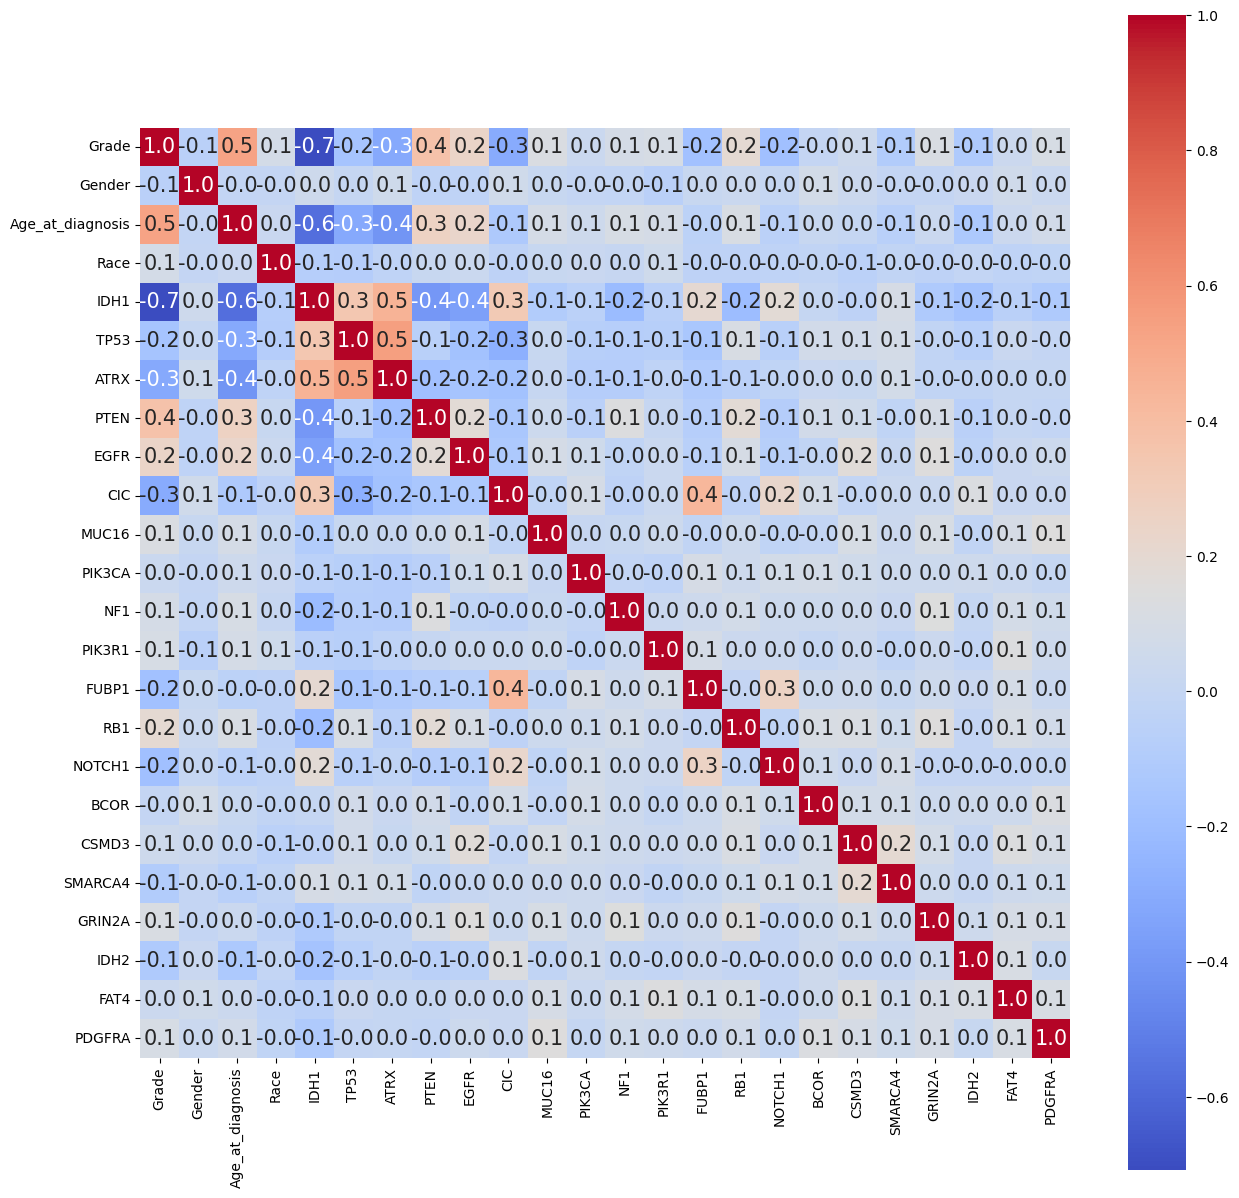

In [16]:
corr = GliomaData.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='coolwarm')
plt.show()

In [17]:
corr[abs(corr["Grade"]) > 0.5]

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
Grade,1.000000,-0.059124,0.528953,0.080339,-0.708432,-0.160797,-0.313827,0.367427,0.241798,-0.302906,...,-0.180631,0.195305,-0.184870,-0.002014,0.050419,-0.100056,0.118816,-0.112930,0.034921,0.102447
Age_at_diagnosis,0.528953,-0.012978,1.000000,0.019326,-0.568973,-0.310540,-0.413459,0.259510,0.227731,-0.120578,...,-0.044362,0.106724,-0.050029,0.015435,0.004073,-0.067457,0.026859,-0.121952,0.037112,0.069819
IDH1,-0.708432,0.047184,-0.568973,-0.080022,1.000000,0.339594,0.453805,-0.395117,-0.357440,0.319980,...,0.204247,-0.204571,0.179736,0.000233,-0.040764,0.094312,-0.108302,-0.161896,-0.059701,-0.113486


The heatmap shows all correlations between the relevant variables of the data set. As one can see, since our target variable is **grade** and the task is to determine which other variables may predict this, high correlations lie between **Grade** and **Age_at_diagnosis** and **Grade** and **IDH1**. Now we write a code to generate 20 plots each for a gene and observe the proportion of glioma grade by mutation status.

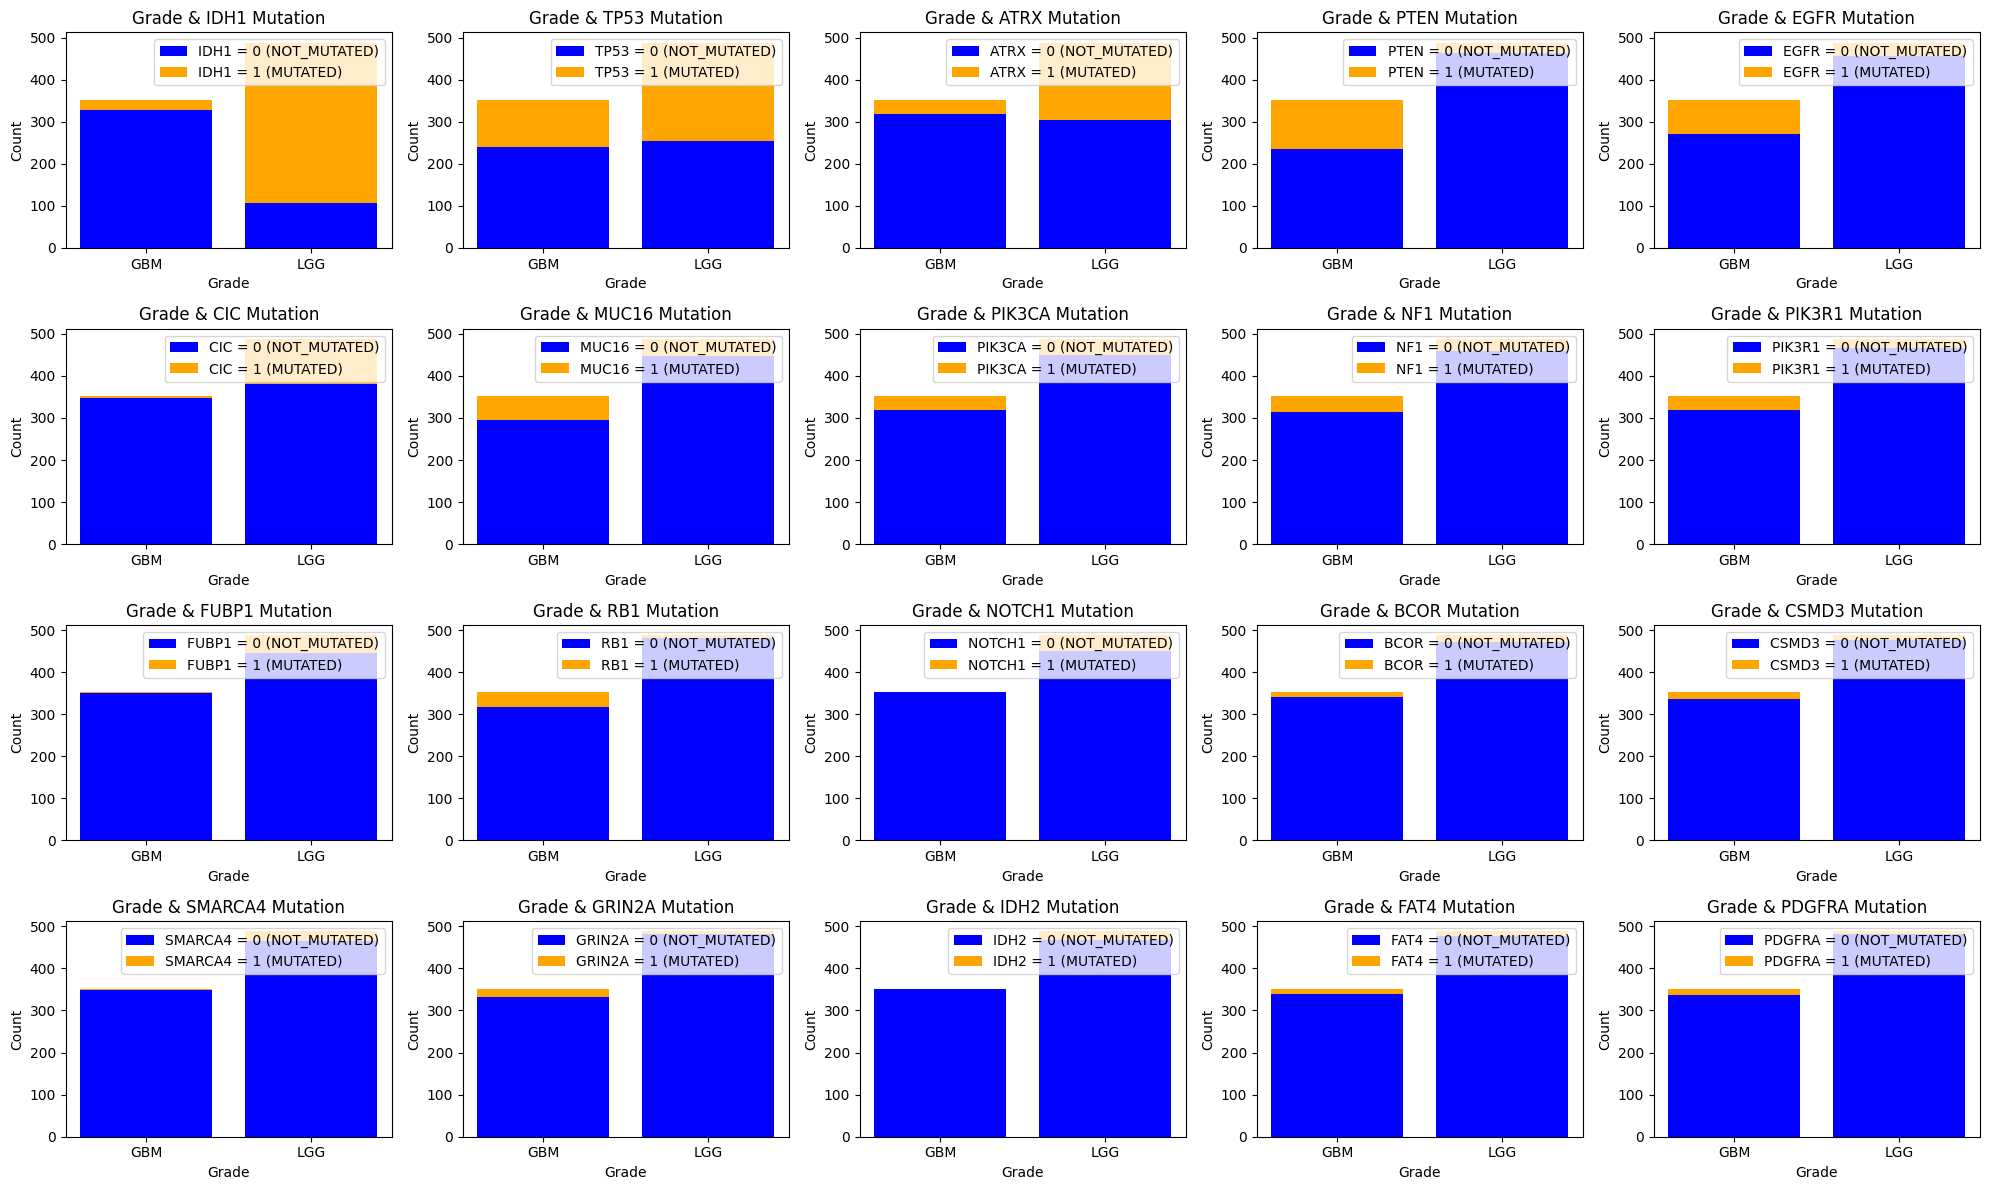

In [18]:
import matplotlib.pyplot as plt

gene_columns = GliomaData.columns[4:] 
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 12))
axes = axes.flatten()

for i, gene in enumerate(gene_columns):
    count1 = GliomaData[(GliomaData['Grade'] == 1) & (GliomaData[gene] == 0)].shape[0]
    count2 = GliomaData[(GliomaData['Grade'] == 1) & (GliomaData[gene] == 1)].shape[0]
    count3 = GliomaData[(GliomaData['Grade'] == 0) & (GliomaData[gene] == 0)].shape[0]
    count4 = GliomaData[(GliomaData['Grade'] == 0) & (GliomaData[gene] == 1)].shape[0]
    total_1 = count1 + count2
    total_2 = count3 + count4

    ax = axes[i]
    ax.bar('GBM', count1, color='blue', label=f'{gene} = 0 (NOT_MUTATED)')
    ax.bar('GBM', count2, bottom=count1, color='orange', label=f'{gene} = 1 (MUTATED)')
    
    ax.bar('LGG', count3, color='blue')
    ax.bar('LGG', count4, bottom=count3, color='orange')
    
    ax.set_xlabel('Grade')
    ax.set_ylabel('Count')
    ax.set_title(f'Grade & {gene} Mutation')

    ax.legend()

plt.tight_layout()
plt.show()

In this data visualization it is very interesting to observe for each gene whether there are differences between the two barplots. The gene **IDH1**, **TP53**, **ATRX**, **PTEN** and **EFGR** show pretty clear differences of mutation status proportion in the two glioma grades. This could mean, that these genes are important in predicting the outcome of glioma grade. The gene **IDH1** presents the highest proportion difference, meaning that its mutation could lead to Lower-Grade Glioma. 

## Model Implementation

In the following we proceed with the model implementation of the data set. First we split the data set into test and trining data sets. Since the target variable is binary in this case it is not reasonable to use multiple linear regression, because this would require the target variable to be continous. Instead, we implement logistic regression, CART methods, SVM and try kNN.

In [19]:
from sklearn.model_selection import train_test_split

X = GliomaData.drop(columns=["Grade"])  
y = GliomaData["Grade"]

Before we start with the implementation, we have to scale the feature matrix X, since there are large differences between coloumn values, such as in **Age_at_diagnosis** (continous) and mutation status coloumns (binary). In the following we make use of **StandardScaler()** from the library **sklearn.preprocessing** and normalize X.

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-0.84722571  0.0266856  -0.29038302 ... -0.16778491 -0.16778491
  -0.16399654]
 [-0.84722571 -0.77049099 -0.29038302 ... -0.16778491 -0.16778491
  -0.16399654]
 [-0.84722571 -0.99513091 -0.29038302 ... -0.16778491 -0.16778491
  -0.16399654]
 ...
 [ 1.180323    1.68631282 -0.29038302 ... -0.16778491 -0.16778491
  -0.16399654]
 [-0.84722571  0.78931556 -0.29038302 ... -0.16778491 -0.16778491
  -0.16399654]
 [-0.84722571  1.63041324  2.4198585  ... -0.16778491 -0.16778491
  -0.16399654]]


Now we can split the data into training and test data sets. We will fit **X_train** in LogisticRegression() and use the estimated parameters to test the performance of the model with the test data (**X_test**,**y_test**).

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=115) # test size is 20% of the original data

### Logistic Regression

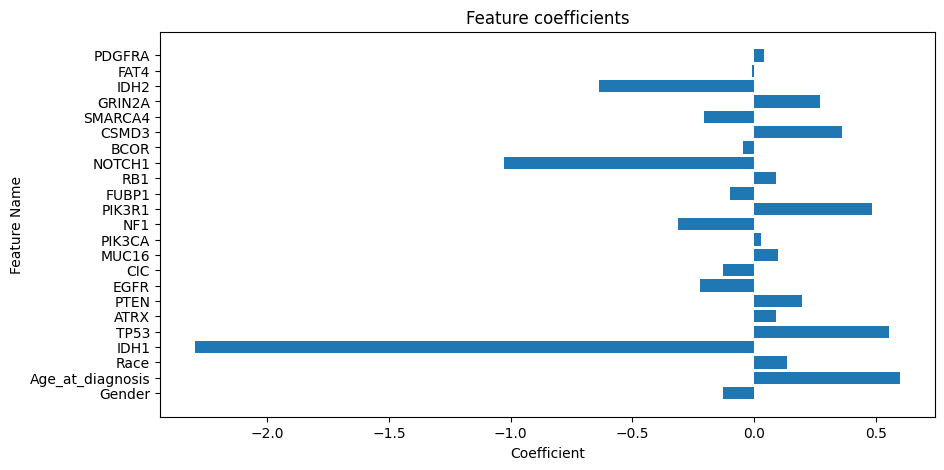

In [22]:
from sklearn.linear_model import LogisticRegression
LogMod = LogisticRegression()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

import pandas as pd
import matplotlib.pyplot as plt

# Fit Logistic Regression Model for training data set
LogMod = LogisticRegression()
LogMod.fit(X_train, y_train)
# Coefficients of the logistic regression model
coefficients = LogMod.coef_[0]

# Feature Importance plot
plt.figure(figsize=(10, 5))
plt.barh(X.columns, coefficients)
plt.xlabel("Coefficient")
plt.ylabel("Feature Name")
plt.title("Feature coefficients")
plt.show()


This plot shows the coefficient value for each predictor and as one can see the negative values decrease the value of the target variable, which leads to an increase in probability of the glioma grade "LGG" (encoded as 0), if the gene is mutated. As an example, the genes **IDH1**, **NOTCH1** and **IDH2** have high negative coefficients. On the other hand, high positive predictors, such as **TP53** and **Age_at_diagnosis** are important indicators for **GBM**. To evaluate the performance of the model we compute the confusion matrix, the accuracy score and the Area Under the Curve (AUC) of the Receiver Operating Characteristic Curve.

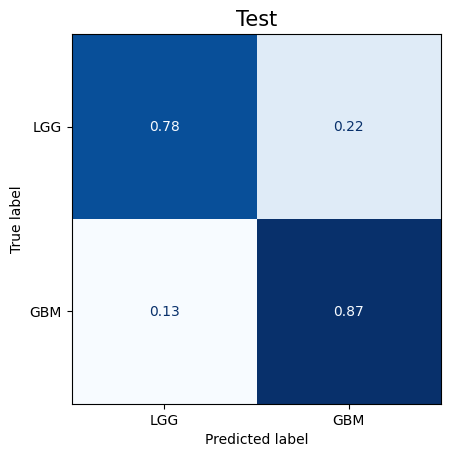

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, accuracy_score, precision_score
import matplotlib.pyplot as plt

# Predictions for test data using estimated parameters of LogMod.fit(X_train, y_train)
y_test_pred = LogMod.predict(X_test)
y_train_pred = LogMod.predict(X_train)
labels = ['LGG', 'GBM']

# Confusion matrix for test data set
cm_test = confusion_matrix(y_test, y_test_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=labels)
disp.plot(cmap="Blues", colorbar = False)
plt.title('Test', fontsize=15)


plt.show()


The confusion matrix shows that 78% of the outcome **LGG** was predicted correctly, while 87% of the test data pedicted correctly **GBM**. This is of course a good result, but the accuracy and AUC-score are more adequate to assess the performance of the model. 

In [24]:
# Probabilities of p(x) = P(Y = 1|X) for training data set
def probs(X, model):
    logits = np.dot(X, model.coef_.T) + model.intercept_
    probs_value = 1 / (1 + np.exp(-logits))
    return(probs_value)

In [25]:
f'Accuracy of trainig data : {accuracy_score(y_train, y_train_pred)}, Precision of trainig data : {precision_score(y_train, y_train_pred)}'

'Accuracy of trainig data : 0.8928571428571429, Precision of trainig data : 0.8338658146964856'

In [26]:
f'Accuracy of test data : {accuracy_score(y_test, y_test_pred)}, Precision of test data : {precision_score(y_test, y_test_pred)}'
acc_log = accuracy_score(y_test, y_test_pred)
prec_log = precision_score(y_test, y_test_pred)

We write a function for the ROC Curve, including the AUC-score. We will use this function for all model performances.

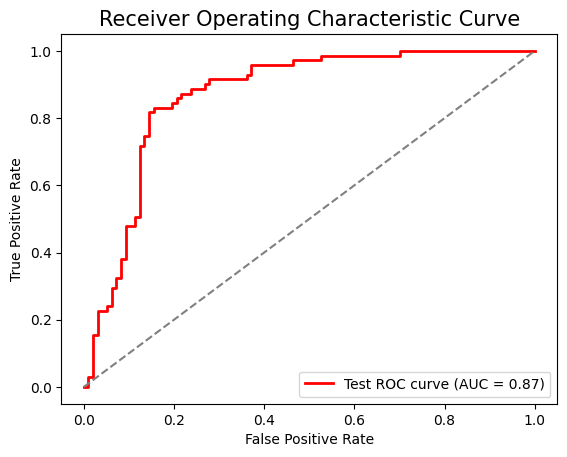

In [27]:
# AUC-ROC curve
def AUC_ROC_curve(y_test, probs_test):
    fpr_test, tpr_test, _ = roc_curve(y_test, probs_test)
    roc_auc_test = roc_auc_score(y_test, probs_test)
    
    plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve', fontsize=15)
    plt.legend(loc='lower right')
    plt.show()
AUC_ROC_curve(y_test, probs(X_test, LogMod))
auc_log = roc_auc_score(y_test, probs(X_test, LogMod))

The plot shows the Receiver Operating Characteristic Curve for the test data. While precision and accuracy show good values for the data, the AUC value is a more appropriate measure than accuracy. The AUC value is 0.87, indicating a good performance of the logistic model. However, we will fit other models in the data, in order to improve the perfomance.

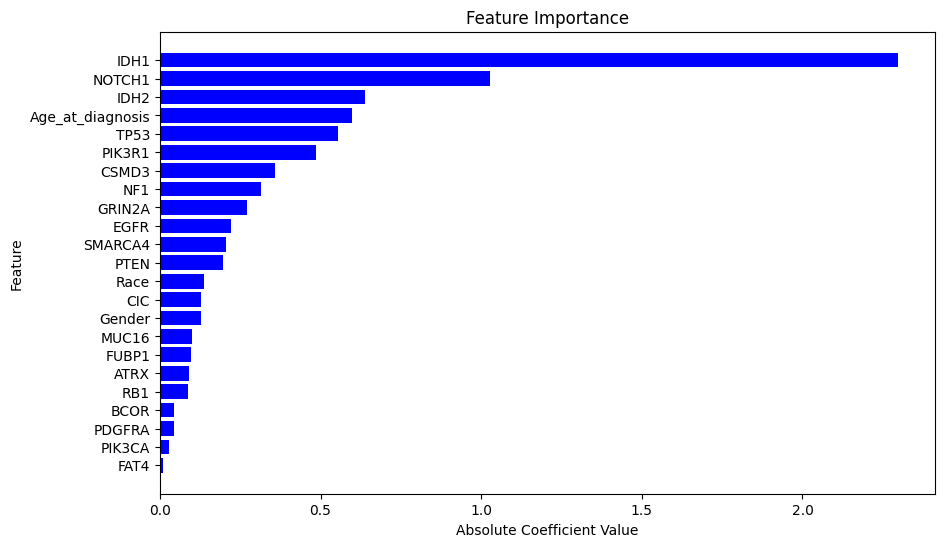

In [28]:
def VarImp(X, model):
    coef = model.coef_[0]
    features = pd.DataFrame({'Feature': X.columns, 'Coefficient': coef})
    features['AbsCoeff'] = np.abs(features['Coefficient'])  # Absolute value
    features = features.sort_values(by='AbsCoeff', ascending=False)
    
    # Feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(features['Feature'], features['AbsCoeff'], color='blue')
    plt.xlabel("Absolute Coefficient Value")
    plt.ylabel("Feature")
    plt.title("Feature Importance")
    plt.gca().invert_yaxis() 
    plt.show()
VarImp(X, LogMod)

This plot shows the variable importance among all predictors. The five most important features are **IDH1**, **NOTCH1**, **IDH2**, **Age_at_diagnosis** and **TP53**.

### CART Methods

We now proceed with CART methods, which do not require any scaling. Therefore, we split the original data X into training and test data set. We will further use classification tree models of the python library scikit-learn, since our target variable is binary. We will fit the following models to the data: Classification Tree, Random Forest and Gradient Boosting.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123) # test size is 20% of the original data

#### Classification Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
TreeMod = DecisionTreeClassifier()
TreeMod.fit(X_train, y_train)
TreeMod.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

The library scikit-learn does not apply k-fold-CV for the hyperparameters tuning of the classifiers, instead it sets the default parameters. Since we want to optimize the model and potentially find the best one for the data, we choose a parameter grid for just some parameters, otherwise Cross-Validation would be computationally expensive. We set a parameter grid for:
- **max_depth** (maximum depth of the tree)
- **min_samples_split** (minimum number of samples required to split an internal node)
- **min_samples_leaf** (minimum number of samples required to be at a leaf node)
- **ccp_alpha** (Complexity parameter used for Minimal Cost-Complexity Pruning)

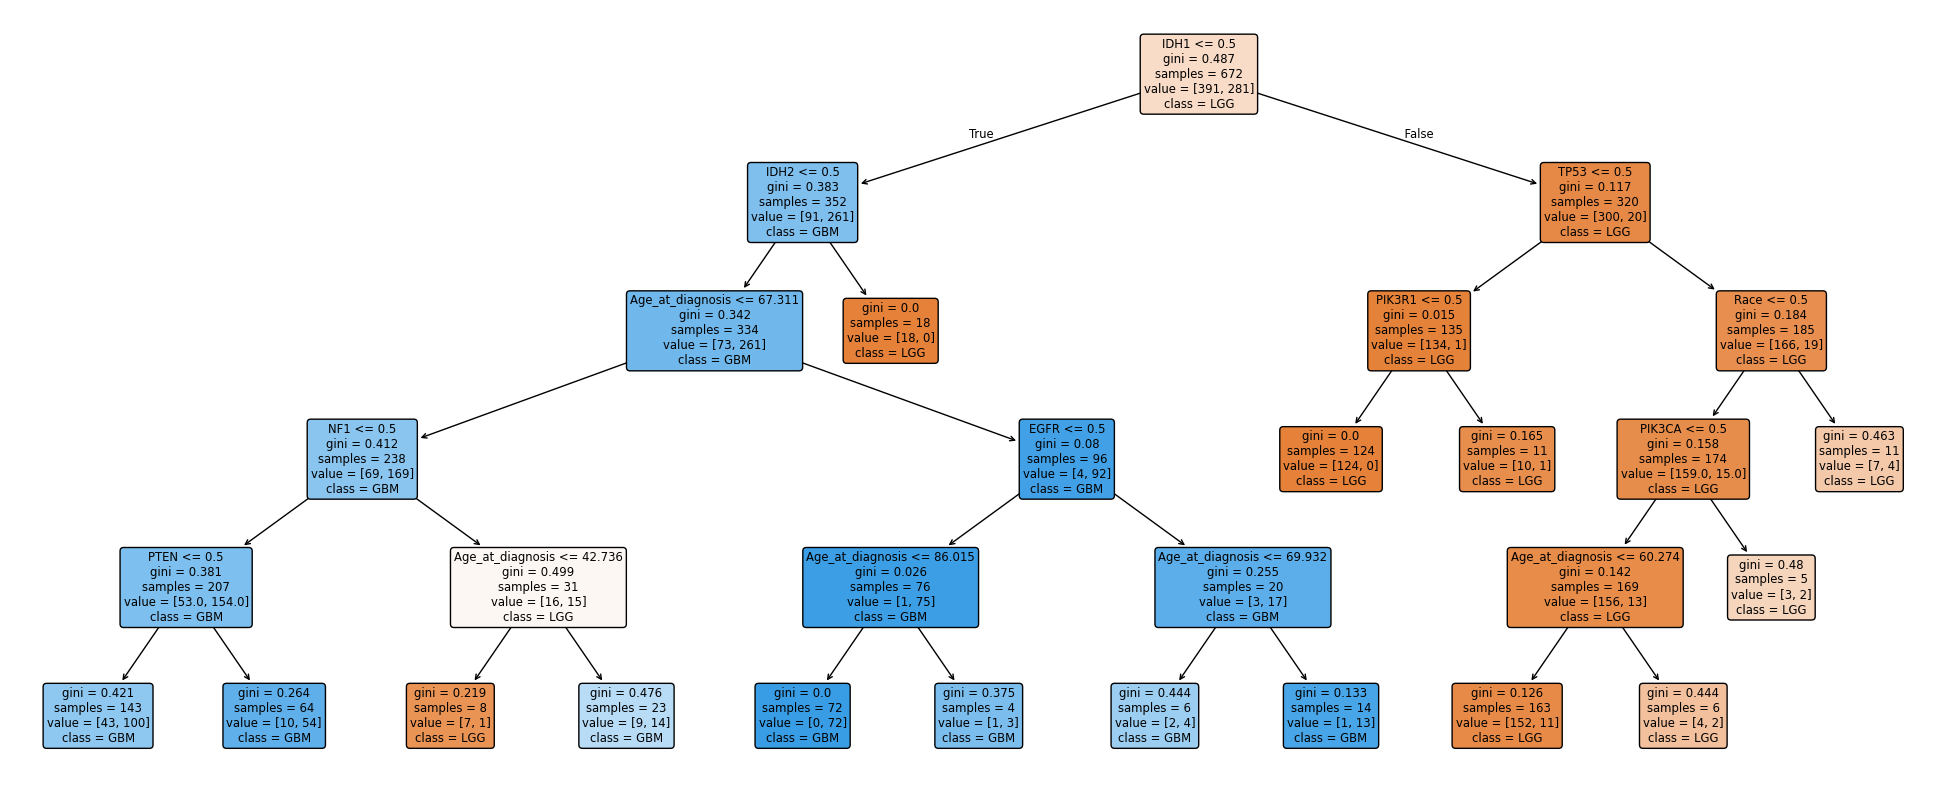

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid_tree = {
    'max_depth': [None, 5, 10, 20],                
    'min_samples_split': [2, 5, 10, 20, 30],              
    'min_samples_leaf': [1, 2, 4, 10, 20],              
    'ccp_alpha': [0.0, 0.01, 0.1, 0.25, 0.5]         
}
# 10fold-CV for some hyperparameters tuning
grid_search = GridSearchCV(estimator=TreeMod, param_grid=param_grid_tree, cv=10, scoring='accuracy')
# Fit the model
grid_search.fit(X_train, y_train)
plt.figure(figsize=(25, 10))
TreeMod = grid_search.best_estimator_
plot_tree(grid_search.best_estimator_, feature_names=X.columns, class_names=["LGG","GBM"], filled=True, rounded=True)
plt.show()

We can now observe how the decision tree is constructed, after selecting the optimal hypertuning parameters. The root of the tree splits on the feature **IDH1** <= 0.5, determining whether the path goes left or right. If **IDH2** <= 0.5 is true, the tree further splits based on **Age_at_diagnosis** <= 67.3 (if **IDH2** <= 0.5), which leads to a classification of GBM if false or if **NF1** <= 0.5 true. If **IDH1** > 0.5 (the right path from the root), all nodes lead to a **LGG** classification with a smaller average value of the Gini-index compared to the left path.  Note that the Gini-Index is a classification criteria that determines the node purity. A small value indicates that a node contains predominantly observations from a single class. From this model we can interpret that if the gene **IDH1** is mutated (**IDH** = 1) and both **TP53** and **PIK3R1** are not mutated, we can classify the brain tumor grade as **LGG** with a Gini-Index of 0. On the other hand, if **TP53** is mutated, the **Race** is white (= 0), **PIK3CA** is not mutated and **Age_at_diagnosis** <= 60.274, the we can classify the glioma as **LGG** again with a high node purity (0.126).

In [32]:
TreeMod.get_params() # chosen parameters by 10fold cross validation

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 20,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [33]:
y_test_pred = TreeMod.predict(X_test)
acc_tree = accuracy_score(y_test, y_test_pred)
prec_tree = precision_score(y_test, y_test_pred)
print(f'Accuracy: {acc_tree}, Precision: {prec_tree}')

Accuracy: 0.8988095238095238, Precision: 0.8461538461538461


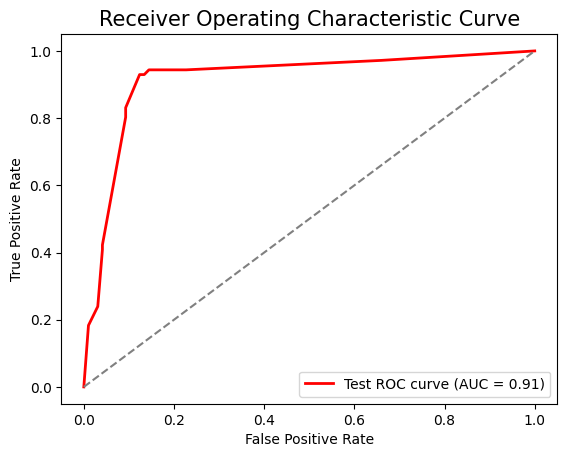

In [34]:
AUC_ROC_curve(y_test, TreeMod.predict_proba(X_test)[:, 1])
auc_tree = roc_auc_score(y_test, TreeMod.predict_proba(X_test)[:, 1])

The accuracy and AUC-score of the decision tree are higher than that of the logistic regression model, leading to an improvement of the model performance.

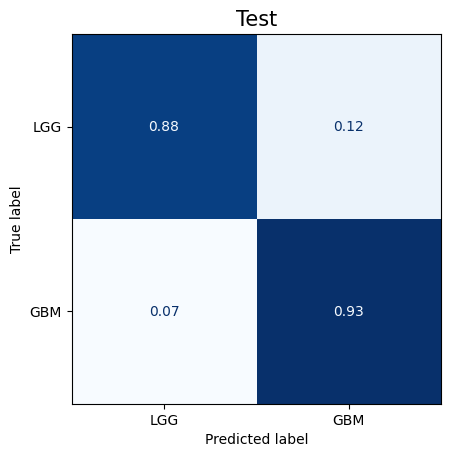

In [35]:
# Confusion matrix for test data set
cm_test = confusion_matrix(y_test, y_test_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=labels)
disp.plot(cmap="Blues", colorbar = False)
plt.title('Test', fontsize=15)
plt.show()

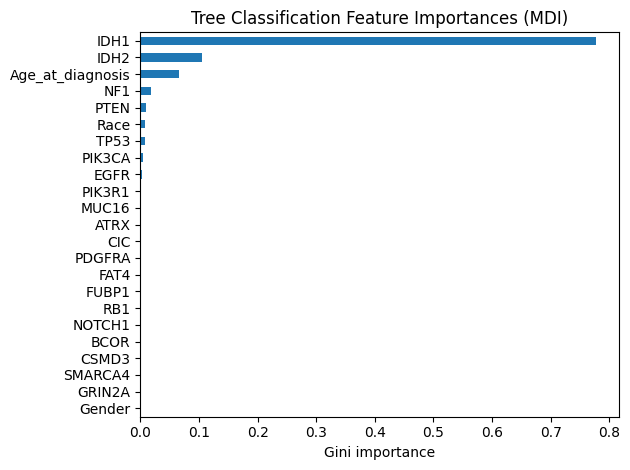

In [36]:
import pandas as pd

feature_names = X.columns

mdi_importances = pd.Series(TreeMod.feature_importances_, index=feature_names).sort_values(ascending=True)
ax = mdi_importances.plot.barh()
ax.set_title("Tree Classification Feature Importances (MDI)")
ax.set_xlabel("Gini importance")
ax.figure.tight_layout()

This visualization shows the feature importance in the tree classification model. We observe, that most of the feature variables are not used in the decision tree, also due to the selected hyperparameters tuning. The two most important variables are the genes **IDH1** and **IDH2**.

#### Random Forest

We now fit the Random Forest model to the data using **RandomForestClassifier** from the library **sklearn.ensemble**. As with the decision tree, we perform Cross Validation for some hypertuning parameters. However **GridSearchCV** would be very computationally expensive for fitting a Random Forest Model. Instead we use **RandomizedSearchCV**, which does not try all combinations between parameter values, but rather searches randomly over a specified number of parameter settings, given by **n_iter**. 

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
RFMod = RandomForestClassifier()
param_grid_rf = {
    'ccp_alpha': [0.0, 0.01, 0.1, 0.5, 0.7],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5],
    'n_estimators': [50, 100]
}
grid_search = RandomizedSearchCV(estimator=RFMod, param_distributions=param_grid_rf, n_iter = 10, cv=10, scoring="accuracy" )

In [38]:
grid_search.fit(X_train, y_train)
RFMod = grid_search.best_estimator_
RFMod.get_params() # selected hyperparameters tuning

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [39]:
y_test_pred = RFMod.predict(X_test)
acc_RF = accuracy_score(y_test, y_test_pred)
prec_RF = precision_score(y_test, y_test_pred)
print(f'Accuracy: {acc_RF}, Precision: {prec_RF}')

Accuracy: 0.8988095238095238, Precision: 0.8552631578947368


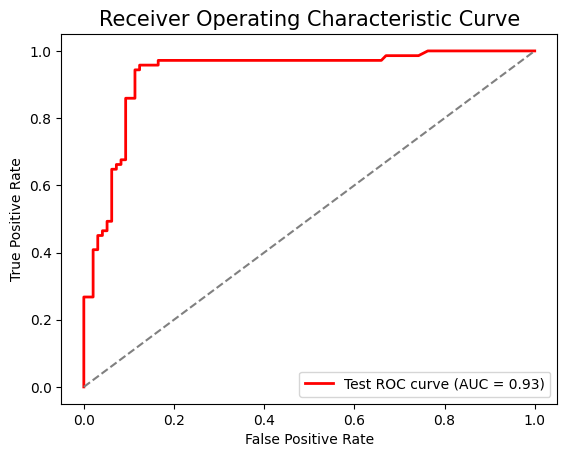

In [40]:
AUC_ROC_curve(y_test, RFMod.predict_proba(X_test)[:, 1])
auc_RF = roc_auc_score(y_test, RFMod.predict_proba(X_test)[:, 1])

Random Forest has definitely the best AUC-score (= 0.93) among the previous models.

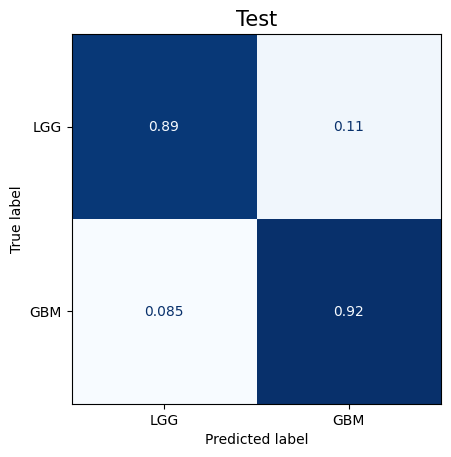

In [41]:
# Confusion matrix for test data set
cm_test = confusion_matrix(y_test, y_test_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=labels)
disp.plot(cmap="Blues", colorbar = False)
plt.title('Test', fontsize=15)
plt.show()

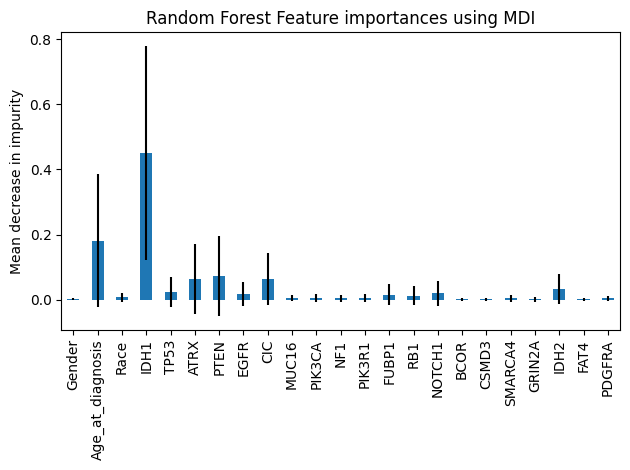

In [42]:
import pandas as pd
importances = RFMod.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)
std = np.std([tree.feature_importances_ for tree in RFMod.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Random Forest Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

This plot shows the feature importances using the Mean Decrease in Impurity (MDI) method, which measures how much each feature contributes to reducing impurity in the Random Forest model. The y-axis represents the mean decrease in impurity, where higher values indicate more important features. **IDH1** and **Age_at_diagnosis** are the most important features, with **IDH1** showing the highest decrease in impurity. Other notable features are **CIC**, **ATRX** and **PTEN**. On the other hand, features like **Gender**, **PIK3CA** and **FAT4** show very low importance. The black bars represent the standard deviation of the importance values.

#### Gradient Boosting

We now fit the last model of the CART methods: Boosting. 

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
boosting = GradientBoostingClassifier()
boosting.fit(X_train, y_train)

GradientBoostingClassifier()

In [44]:
boosting.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [45]:
y_train_pred = boosting.predict(X_train)
y_test_pred = boosting.predict(X_test)
acc_boosting = accuracy_score(y_test, y_test_pred)
prec_boosting = precision_score(y_test, y_test_pred)
print(f'Accuracy: {acc_boosting}, Precision: {prec_boosting}')

Accuracy: 0.875, Precision: 0.8378378378378378


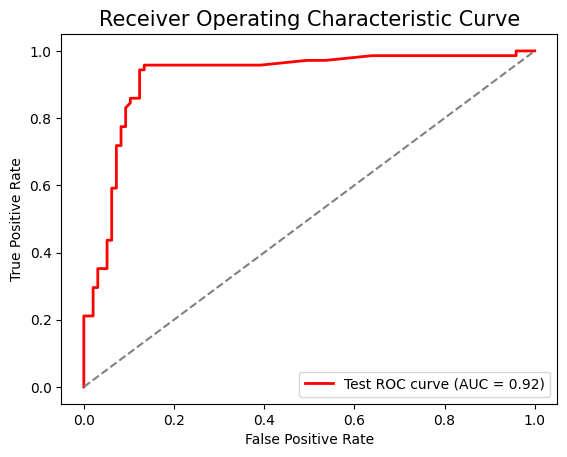

In [46]:
AUC_ROC_curve(y_test, boosting.predict_proba(X_test)[:, 1])
auc_boosting = roc_auc_score(y_test, boosting.predict_proba(X_test)[:, 1])

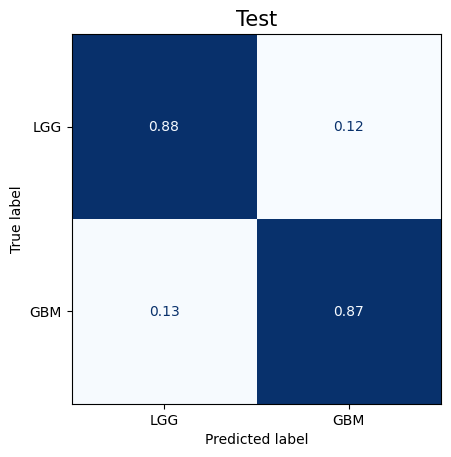

In [47]:
# Confusion matrix for test data set
cm_test = confusion_matrix(y_test, y_test_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=labels)
disp.plot(cmap="Blues", colorbar = False)
plt.title('Test', fontsize=15)
plt.show()

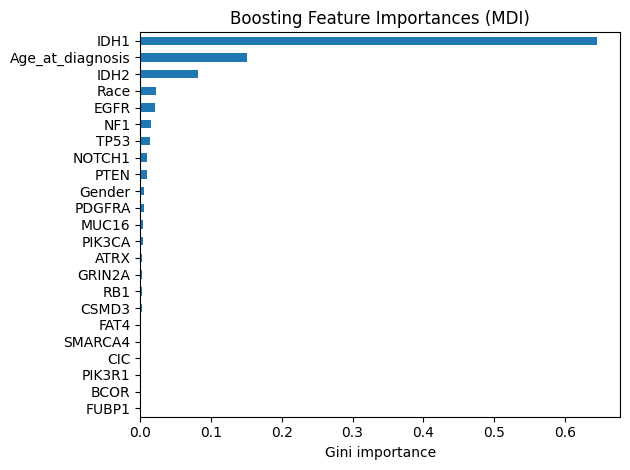

In [48]:
feature_names = X.columns

mdi_importances = pd.Series(boosting.feature_importances_, index=feature_names).sort_values(ascending=True)
ax = mdi_importances.plot.barh()
ax.set_title("Boosting Feature Importances (MDI)")
ax.set_xlabel("Gini importance")
ax.figure.tight_layout()

The accuracy score and AUC-score are high. The feature importance order has slightly changed compared to random forest. **IDH1** and **Age_at_diagnosis** are still at the top, but now **IDH2** and **Race** gain more importance. 

### Support Vector Machines (SVM)

In Support Vector Machines is important to scale the feature matrix X, otherwise the features with the largest range (e.g.**Age_at_diagnosis**) will dominate in the computation of the kernel matrix.

In [49]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123) # test size is 20% of the original data

In [50]:
from sklearn.svm import SVC
svm_mod = SVC(kernel = "linear", probability = True)
svm_mod.fit(X_train, y_train)
y_test_pred = svm_mod.predict(X_test)
svm_mod.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

We apply 10fold-CV to select only the optimal regularization parameter C, while other parameters are set to default values. 

In [51]:
param_grid_svm = {
    'C': [0.01,0.1,0.2,0.5,0.7,1,2,3,5,10,15,20,50,100]
}

grid_search = GridSearchCV(estimator=svm_mod, param_grid=param_grid_svm, cv=10)

In [52]:
grid_search.fit(X_train, y_train)
svm_mod = grid_search.best_estimator_
svm_mod.get_params()

{'C': 0.1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

The chosen parameter value for C is 0.1.

In [53]:
y_train_pred = svm_mod.predict(X_train)
y_test_pred = svm_mod.predict(X_test)
acc_svm = accuracy_score(y_test, y_test_pred)
prec_svm = precision_score(y_test, y_test_pred)
print(f'Accuracy: {acc_svm}, Precision: {prec_svm}')

Accuracy: 0.8869047619047619, Precision: 0.8421052631578947


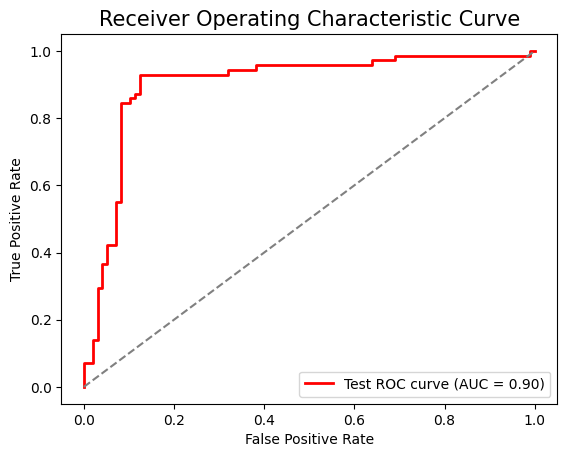

In [54]:
AUC_ROC_curve(y_test, svm_mod.predict_proba(X_test)[:, 1])
auc_svm = roc_auc_score(y_test, svm_mod.predict_proba(X_test)[:, 1])

The AUC-score (= 0.9) is smaller compared to the AUC-score of the Random Forest classifier.

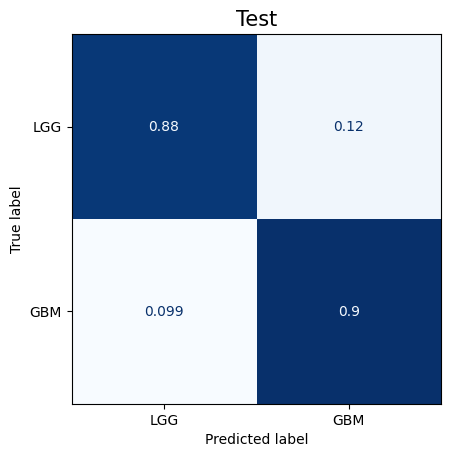

In [55]:
# Confusion matrix for test data set
cm_test = confusion_matrix(y_test, y_test_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=labels)
disp.plot(cmap="Blues", colorbar = False)
plt.title('Test', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Feature Importance SVM')

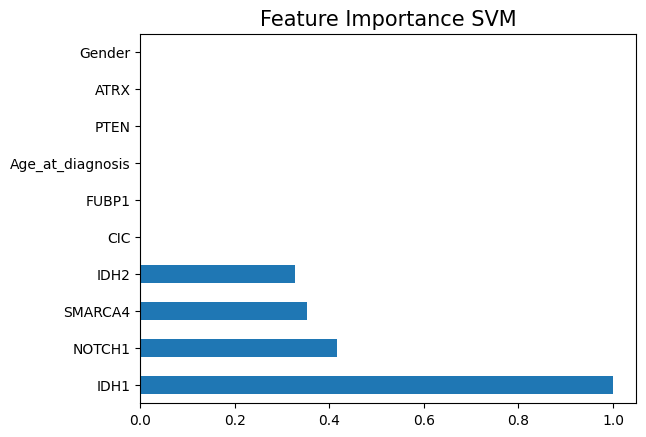

In [56]:
pd.Series(abs(svm_mod.coef_[0]), index=X.columns).nlargest(10).plot(kind='barh')
plt.title('Feature Importance SVM', fontsize=15)

The plot shows the absolute coefficient values of the variable. **IDH1** is at the top, still indicating a high importance in the data, followed by **NOTCH1**, **SMARCA4** and **IDH2**, while other parameters are set to 0. 

### K-nearest Neighbor (kNN)

In the final part of the model implementation, we fit the k-Nearest Neighbors model to the data using the scaled version of X from the previous model. We set the number of neighbors to 20 and observe the results.

In [57]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=20)
kNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [58]:
kNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 20,
 'p': 2,
 'weights': 'uniform'}

In [59]:
y_train_pred = kNN.predict(X_train)
y_test_pred = kNN.predict(X_test)
acc_kNN = accuracy_score(y_test, y_test_pred)
prec_kNN = precision_score(y_test, y_test_pred)
print(f'Accuracy: {acc_kNN}, Precision: {prec_kNN}')

Accuracy: 0.8869047619047619, Precision: 0.8611111111111112


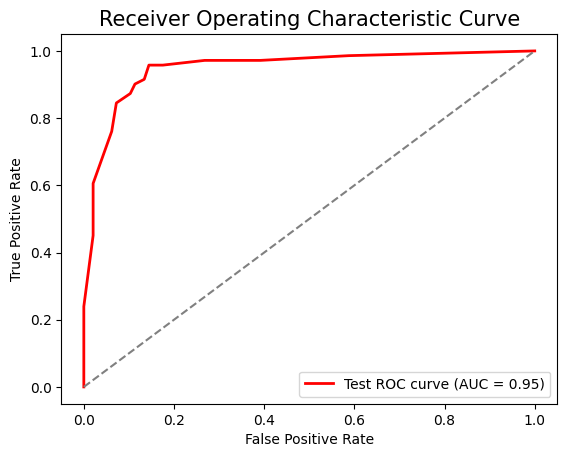

In [60]:
AUC_ROC_curve(y_test, kNN.predict_proba(X_test)[:, 1])
auc_kNN = roc_auc_score(y_test, kNN.predict_proba(X_test)[:, 1])

The k-nearest-neighbor Model definitely has the highest AUC-score (0.95) among all other models. It is the best candidate for this data. 

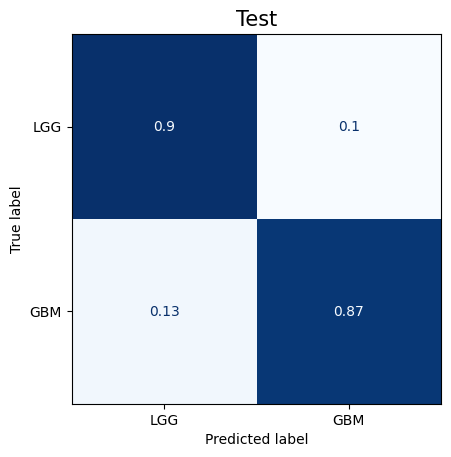

In [61]:
# Confusion matrix for test data set
cm_test = confusion_matrix(y_test, y_test_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=labels)
disp.plot(cmap="Blues", colorbar = False)
plt.title('Test', fontsize=15)
plt.show()

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90        97
           1       0.86      0.87      0.87        71

    accuracy                           0.89       168
   macro avg       0.88      0.89      0.88       168
weighted avg       0.89      0.89      0.89       168



### Model Comparison

In [63]:
models_auc = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Boosting', 'Support Vector Machines', 'k-Nearest-Neighbor'],
    'AUC Score': [auc_log, auc_tree, auc_RF, auc_boosting, auc_svm, auc_kNN]})
models_auc.sort_values(by='AUC Score', ascending=False)

,Model,AUC Score
5,k-Nearest-Neighbor,0.948236
2,Random Forest,0.931392
3,Boosting,0.920357
1,Decision Tree,0.914622
4,Support Vector Machines,0.901844
0,Logistic Regression,0.870335


The model presenting the highest AUC-score is the k-Nearest-Neighbor model achieving a AUC-score of 0.95. 

In [64]:
models_acc = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Boosting', 'Support Vector Machines', 'k-Nearest-Neighbor'],
    'Accuracy Score': [acc_log, acc_tree, acc_RF, acc_boosting, acc_svm, acc_kNN]})
models_acc.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score
1,Decision Tree,0.898810
2,Random Forest,0.898810
4,Support Vector Machines,0.886905
5,k-Nearest-Neighbor,0.886905
3,Boosting,0.875000
0,Logistic Regression,0.821429


The models presenting the highest accuracy score are the Random Forest and Decision Tree, achieving a accuracy score of 0.90. 

In [65]:
models_prec = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Boosting', 'Support Vector Machines', 'k-Nearest-Neighbor'],
    'Precision Score': [prec_log, prec_tree, prec_RF, prec_boosting, prec_svm, prec_kNN]})
models_prec.sort_values(by='Precision Score', ascending=False)

,Model,Precision Score
5,k-Nearest-Neighbor,0.861111
2,Random Forest,0.855263
1,Decision Tree,0.846154
4,Support Vector Machines,0.842105
3,Boosting,0.837838
0,Logistic Regression,0.746988


The model presenting the highest precision score is the k-Nearest-Neighbor model achieving a precision score of 0.86. 

### Conclusion

In conclusion, the k-Nearest Neighbors (kNN) model performs the best in terms of both AUC-score and Precision-score, demonstrating its strong capability to correctly classify the target variable. However, one limitation of kNN is that it does not provide a direct interpretation of feature importance, which makes it difficult to understand which variables are most influential in the classification process. 
On the other hand, Random Forest is the second-best model. It offers an important advantage in terms of feature importance, but has a lower AUC-score compared to kNN.